<a href="https://colab.research.google.com/github/z27833009/2022-Machine-Learning-Specialization/blob/main/KI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from sklearn import tree #导入指定模块

clf = tree.DecisionTreeClassifier() #实例化

clf = clf.fit(a_train , b_train) #用训练的数据训练模型

result = clf.score(a_test , b_test) #导入测试集，从街口中调用需要的信息

导入数据，先看下银行流水记录表的信息情况：

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
columns = ['user_id','time','loan_type','loan_amount','income']
df_bank_train = pd.read_table('bank_detail_train.txt',names = columns, sep=',' )   #银行流水记录表
df_bank_train.head()

,user_id,time,loan_type,loan_amount,income
0,6965,5894316387,0,13.756664,0
1,6965,5894321388,1,13.756664,0
2,6965,5897553564,0,14.449810,0
3,6965,5897563463,1,10.527763,0
4,6965,5897564598,1,13.651303,0


看下缺失值情况：

In [ ]:
df_bank_train.isnull().sum()

user_id        0
time           0
loan_type      0
loan_amount    0
income         0
dtype: int64

发现数据完整没有缺失。再看一下用户id的总数：

In [ ]:
len(df_bank_train.user_id.unique())

9294

有9294条不同用户在银行的流水记录。
同理导入其他5张表并看下基本信息：

In [ ]:
columns1 = ['user_id','time','bank_id','last_bill_amount','last_repay_amount','credit_amount','cur_bill_bal','cur_bill_minrepay','cons_num','cur_bill_amount','adjust_amount','cyclic_accr','avail_bal','borrow_cash','repay_status']
columns2 = ['user_id','time','brows_beh','brows_num']
columns3 = ['user_id','time']
columns4 = ['user_id','overdue']
columns5 = ['user_id','sex','job','eduction','marriage','residence']
df_bill_train=pd.read_table('bill_detail_train.txt',names = columns1,sep=',' )   #账单记录表
df_browse_train=pd.read_table('browse_history_train.txt',names = columns2,sep=',' ) #浏览信息表
df_loan_train=pd.read_table('loan_time_train.txt',names = columns3,sep=',' ) #放款时间表
df_overdue_train=pd.read_table('overdue_train.txt',names = columns4,sep=',' ) #逾期记录表
df_user_train=pd.read_table('user_info_train.txt',names = columns5,sep=',' ) #用户信息表

账单记录表：

In [ ]:
df_bill_train.head()

,user_id,time,bank_id,last_bill_amount,last_repay_amount,credit_amount,cur_bill_bal,cur_bill_minrepay,cons_num,cur_bill_amount,adjust_amount,cyclic_accr,avail_bal,borrow_cash,repay_status
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


浏览信息表：

In [ ]:
df_browse_train.head()

,user_id,time,brows_beh,brows_num
0,34801,5926003545,173,1
1,34801,5926003545,164,4
2,34801,5926003545,38,7
3,34801,5926003545,45,1
4,34801,5926003545,110,7


放款时间表:

In [ ]:
df_loan_train.head()

,user_id,time
0,1,5914855887
1,2,5914855887
2,3,5914855887
3,4,5914855887
4,5,5914855887


逾期记录表：

In [ ]:
df_overdue_train.head()

,user_id,overdue
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


用户信息表：

In [ ]:
df_user_train.head()

,user_id,sex,job,eduction,marriage,residence
0,3150,1,2,4,1,4
1,6965,1,2,4,3,2
2,1265,1,3,4,3,1
3,6360,1,2,4,3,2
4,2583,2,2,2,1,1


看下各个表的用户id数

In [ ]:
print(len(df_bank_train.user_id.unique()),
     len(df_bill_train.user_id.unique()),
     len(df_browse_train.user_id.unique()),
     len(df_loan_train.user_id.unique()),
     len(df_overdue_train.user_id.unique()),
     len(df_user_train.user_id.unique()))

9294 53174 47330 55596 55596 55596


发现用户信息表，是否逾期表，放款时间表这三张表的id数目都是55,596，银行流水表为9,294，浏览信息表为47,330，信用卡账单表为53,174。
通过用户id数得到并非每个用户都有银行流水记录、信用卡账单等信息，所以这里我们取6个表共同用户的记录筛选后组成完整的表。
进一步筛选，这里加入时间范围



如图，在本课题中是否逾期是在放款时间那一天之后开始计算的，放款时间之后三十天以上没有还款将视为逾期，我们要预测的测试集都是还没有放款的用户特征，所以训练数据这里我们也选取放款时间之前的特征，将存在时间戳的表与放款时间表进行交叉，只筛选此时间范围内的用户id。
通过上面各个表的信息情况，可以看到除了放款时间表外有时间字段的是银行流水记录表、账单记录表、浏览信息表。

(1)筛选符合条件的银行流水记录表的用户id：

In [ ]:
df = pd.merge(left = df_bank_train, right= df_loan_train, how = 'left',on = 'user_id')
df.head()

,user_id,time_x,loan_type,loan_amount,income,time_y
0,6965,5894316387,0,13.756664,0,5923841487
1,6965,5894321388,1,13.756664,0,5923841487
2,6965,5897553564,0,14.449810,0,5923841487
3,6965,5897563463,1,10.527763,0,5923841487
4,6965,5897564598,1,13.651303,0,5923841487


time_x表示流水记录时间，time_y表示放款时间，然后筛选出流水时间<放款时间的记录：

In [ ]:
t = df[(df['time_x']<=df['time_y'])]
t.head()

,user_id,time_x,loan_type,loan_amount,income,time_y
0,6965,5894316387,0,13.756664,0,5923841487
1,6965,5894321388,1,13.756664,0,5923841487
2,6965,5897553564,0,14.449810,0,5923841487
3,6965,5897563463,1,10.527763,0,5923841487
4,6965,5897564598,1,13.651303,0,5923841487


筛选数用户id这一列并进行去重处理：

In [ ]:
bank_user = t[['user_id']]
bank_user = bank_user.drop_duplicates(subset = 'user_id',keep='first')
bank_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9271 entries, 0 to 6069672
Data columns (total 1 columns):
user_id    9271 non-null int64
dtypes: int64(1)
memory usage: 144.9 KB


可以看到在银行流水记录表中符合条件的还有9271个不同用户。
(2)筛选符合条件的账单记录表的用户id：

In [ ]:
df1 = pd.merge(left = df_bill_train, right= df_loan_train, how = 'left',on = 'user_id')
t1 = df1[(df1['time_x']<=df1['time_y'])]
bill_user = t1[['user_id']]
bill_user = bill_user.drop_duplicates(subset = 'user_id',keep='first')
bill_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46739 entries, 0 to 2338115
Data columns (total 1 columns):
user_id    46739 non-null int64
dtypes: int64(1)
memory usage: 730.3 KB


账单记录表中符合条件的还有46739个不同用户。
(3)筛选符合条件的浏览信息表的用户id：

In [ ]:
df2 = pd.merge(left = df_browse_train, right= df_loan_train, how = 'left',on = 'user_id')
t2= df2[(df2['time_x']<=df2['time_y'])]
browse_user = t2[['user_id']]
browse_user= browse_user.drop_duplicates(subset = 'user_id',keep='first')
browse_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44945 entries, 0 to 22919430
Data columns (total 1 columns):
user_id    44945 non-null int64
dtypes: int64(1)
memory usage: 702.3 KB


浏览信息表中符合条件的还有44945个不同用户。
筛选出这6张表共有的用户id（实际为上述的三张表共同的用户id即可）

In [ ]:
user1 = pd.merge(left=bank_user,right=browse_user,how='inner',on = 'user_id')
user2 = pd.merge(left=user1,right=bill_user,how='inner',on = 'user_id')
user2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 0 to 5734
Data columns (total 1 columns):
user_id    5735 non-null int64
dtypes: int64(1)
memory usage: 89.6 KB


得出5735个用户的记录是完整的。然后通过这5735个id筛选每张表的记录，并进行字段预处理。
(1)银行记录表
先筛选出id为‘user2’的记录，根据收入，支出以及工资这三个字段的交易类型进行筛选，并按id进行分组统计，每个分组中生成新的变量。

In [ ]:
bank_select = pd.merge(left=df_bank_train,right = user2,how='inner',on='user_id')
b1= bank_select[(bank_select['loan_type'] == 0)].groupby(['user_id'], as_index=False)  # 收入统计
b2 = bank_select[(bank_select['loan_type'] == 1)].groupby(['user_id'], as_index=False)  # 支出统计
b3 = bank_select[(bank_select['income'] == 1)].groupby(['user_id'], as_index=False)  # 工资收入统计
c1 = b1['loan_amount'].agg({'income_num': 'count', 'income_amount': 'sum'})  #三表共有用户在放款之前的收入次数和收入总额
c2 = b2['loan_amount'].agg({'expen_num': 'count', 'expen_amount': 'sum'})  #支出次数和支出额
c3 = b3['loan_amount'].agg({'wages_num': 'count', 'wages_amount': 'sum'})  #工资收入次数和工资收入额

将生成的字段分别与user2 id交叉组合到一起，由于是分组统计生成的字段，分组外用户id对应的数据是缺失的，这里缺失的数据全部填0

In [ ]:
d1 = pd.merge(left=user2,right =c1,how = 'left',on='user_id')
d1 = d1.fillna(0)
d2 = pd.merge(left=user2,right =c2,how = 'left',on='user_id')
d2 = d2.fillna(0)
d3 = pd.merge(left=user2,right =c3,how = 'left',on='user_id')
d3 = d3.fillna(0)

将填充完整的六个字段组合到一起

In [ ]:
bank_train = d1.merge(d2)
bank_train = bank_train.merge(d3)
bank_train.head()

,user_id,income_num,income_amount,expen_num,expen_amount,wages_num,wages_amount
0,6965,75.0,972.850228,289.0,3234.531975,0.0,0.000000
1,1265,125.0,1708.206195,294.0,3662.457063,0.0,0.000000
2,2583,213.0,2736.475318,618.0,7064.310678,0.0,0.000000
3,29165,189.0,2277.607807,473.0,5099.861165,14.0,202.630532
4,2443,252.0,3020.288782,341.0,3762.790364,0.0,0.000000


(2)账单信息表
去掉了时间、银行id、还款状态这几个变量，按用户id分组后对每个字段均值化处理

In [ ]:
bill_select = pd.merge(left=df_bill_train,right = user2,how='inner',on='user_id')
bill_select.drop(['time','bank_id','repay_status'], axis=1, inplace=True)
e1=bill_select.groupby(['user_id'], as_index=False)
f1= e1['last_bill_amount','last_repay_amount','credit_amount','cur_bill_bal','cur_bill_minrepay','cons_num','cur_bill_amount','adjust_amount','cyclic_accr','avail_bal','borrow_cash'].agg(np.mean)
bill_train = pd.merge(left=user2,right =f1,how = 'left',on='user_id')
bill_train.head()

,user_id,last_bill_amount,last_repay_amount,credit_amount,cur_bill_bal,cur_bill_minrepay,cons_num,cur_bill_amount,adjust_amount,cyclic_accr,avail_bal,borrow_cash
0,6965,10.002659,12.733206,19.971271,19.957631,17.220095,10.750000,18.825107,0.000000,15.520681,0.0,19.624697
1,1265,17.715686,14.191595,19.973385,19.909123,17.866453,1.444444,19.007284,0.000000,5.175483,0.0,9.702118
2,2583,15.192264,15.265601,18.307126,17.736937,10.292788,1.791667,17.199134,0.000000,6.478271,0.0,11.014650
3,29165,-6.973236,12.852082,19.740221,17.921520,15.902257,0.000000,12.969975,0.000000,0.000000,0.0,6.001719
4,2443,16.759482,4.151986,17.309158,19.397134,18.206423,2.251572,15.892834,0.229931,4.082358,0.0,10.873986


(3)浏览记录表
去掉浏览子行为这个变量，对浏览行为数据变量作了按用户id做分组计数统计。

In [ ]:
browse_select = pd.merge(left=df_browse_train,right = user2,how='inner',on='user_id')
g1= browse_select.groupby(['user_id'], as_index=False)
h1= g1['brows_beh'].agg({'brows_beh': 'count', })
browse_train = pd.merge(left=user2,right =h1,how = 'left',on='user_id')
browse_train.head()

,user_id,brows_beh
0,6965,1710
1,1265,420
2,2583,702
3,29165,783
4,2443,671


对剩下的用户信息表和逾期记录表筛选

In [ ]:
overdue_train = pd.merge(left=df_overdue_train,right = user2,how='inner',on='user_id')
user_train = pd.merge(left=df_user_train,right = user2,how='inner',on='user_id')

将筛选后的五个表进行合并

In [ ]:
df_train = user_train.merge(bank_train)
df_train = df_train.merge(bill_train)
df_train = df_train.merge(browse_train)
df_train = df_train.merge(overdue_train)
df_train.head()

,user_id,sex,job,eduction,marriage,residence,income_num,income_amount,expen_num,expen_amount,...,cur_bill_bal,cur_bill_minrepay,cons_num,cur_bill_amount,adjust_amount,cyclic_accr,avail_bal,borrow_cash,brows_beh,overdue
0,6965,1,2,4,3,2,75.0,972.850228,289.0,3234.531975,...,19.957631,17.220095,10.750000,18.825107,0.000000,15.520681,0.0,19.624697,1710,0
1,1265,1,3,4,3,1,125.0,1708.206195,294.0,3662.457063,...,19.909123,17.866453,1.444444,19.007284,0.000000,5.175483,0.0,9.702118,420,0
2,2583,2,2,2,1,1,213.0,2736.475318,618.0,7064.310678,...,17.736937,10.292788,1.791667,17.199134,0.000000,6.478271,0.0,11.014650,702,0
3,29165,1,2,4,1,4,189.0,2277.607807,473.0,5099.861165,...,17.921520,15.902257,0.000000,12.969975,0.000000,0.000000,0.0,6.001719,783,0
4,2443,1,4,4,3,1,252.0,3020.288782,341.0,3762.790364,...,19.397134,18.206423,2.251572,15.892834,0.229931,4.082358,0.0,10.873986,671,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 0 to 5734
Data columns (total 25 columns):
user_id              5735 non-null int64
sex                  5735 non-null int64
job                  5735 non-null int64
eduction             5735 non-null int64
marriage             5735 non-null int64
residence            5735 non-null int64
income_num           5735 non-null float64
income_amount        5735 non-null float64
expen_num            5735 non-null float64
expen_amount         5735 non-null float64
wages_num            5735 non-null float64
wages_amount         5735 non-null float64
last_bill_amount     5735 non-null float64
last_repay_amount    5735 non-null float64
credit_amount        5735 non-null float64
cur_bill_bal         5735 non-null float64
cur_bill_minrepay    5735 non-null float64
cons_num             5735 non-null float64
cur_bill_amount      5735 non-null float64
adjust_amount        5735 non-null float64
cyclic_accr          5735 non-null float64
av

四、特征工程
先看下相关性
（1）银行流水记录特征：

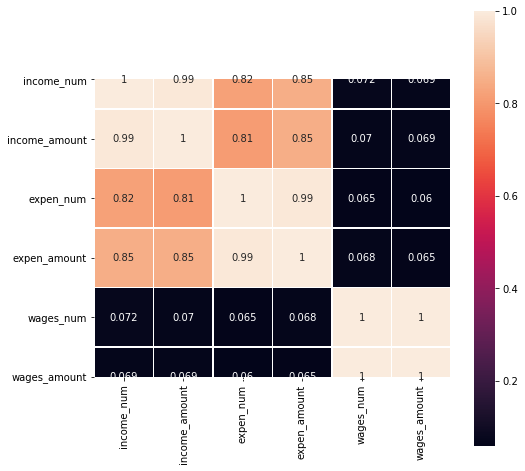

In [ ]:
internal_chars = ['income_num','income_amount','expen_num','expen_amount','wages_num','wages_amount']
corrmat = bank_train[internal_chars].corr()
plt.subplots(figsize=(8,8))
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)

可以看出收入/支出/工资的笔数和金额数目是线性关系，同时收入支出相关性同样较强。
这样，我们保留支出笔数、支出金额、工资笔数、工资金额这四个特征，并且利用这四个特征重新创建两个新的特征：每笔支出平均金额expen_avg=支出金额/支出笔数，每笔工资平均收入wages_avg=工资金额/工资笔数

（2）信用卡记录特征：

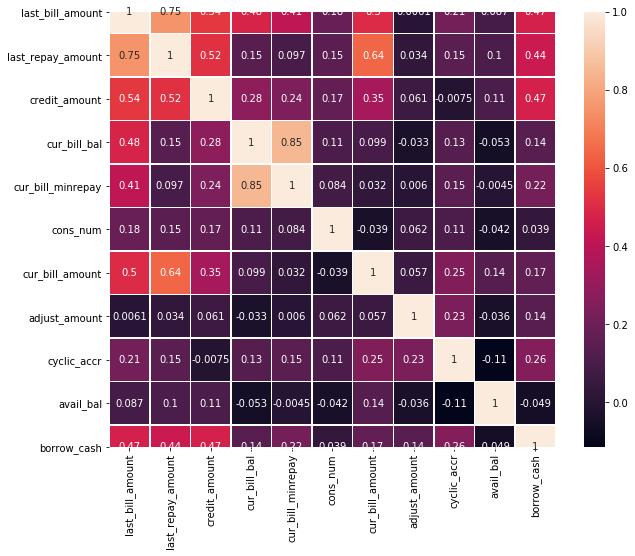

In [ ]:
internal_chars = ['last_bill_amount','last_repay_amount','credit_amount','cur_bill_bal','cur_bill_minrepay'
                  ,'cons_num','cur_bill_amount','adjust_amount','cyclic_accr','avail_bal','borrow_cash']
corrmat = df_train[internal_chars].corr()
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='0')
sns.heatmap(corrmat, square=False, linewidths=.5, annot=True)

可以看出上期账单金额last_bill_amount和上期还款金额last_repay_amount、本期账单余额cur_bill_bal 和本期账单最低还款额 cur_bill_minrepay、上期还款金额last_repay_amount和本期账单金额cur_bill_amount的相关性较强。

还款公式：
本期应还金额 = 上期账单金额-上期还款金额 + 本期账单金额 - 本期调整金额 + 循环利息
根据上期还款金额的多少将上式分为三种情况：
上期还款金额 （或者没还）<上期账单的最低还款额，就视为逾期，而且本期的还款要加上循环利息和上期未还款的那部分
上期最低还款额<上期还款金额<上期账单金额，不视为逾期，但本期的还款要加上循环利息和上期未还款的那部分
上期还款金额 >上期账单金额，也就是说用户还多了，那么本期的还款会减去一个调整金额（多还的那部分），循环利息和上期未还的部分也就为0。
由此也解释了上期还款金额last_repay_amount和本期账单金额cur_bill_amount的相关性较强。
综合以上筛选下信用卡记录的特征：
针对上期账单金额last_bill_amount和上期还款金额last_repay_amount引入一个新特征：上期还款差额 =上期账单金额 - 上期还款金额；
信用额度，字面上感觉与还款是否逾期相关性比较大，所以先保留；
本期的账单余额与最低还款额具有高度共线性，决定只选用最低还款额；
消费笔数，目前来看与其他特征相关性均不高，所以先保留；
本期账单金额，这个根据还款公式可知会影响本期应还金额，所以先保留；
调整金额和循环利息是跟“上期的还款差额”有关的：
还款差额>0，需要计算循环利息，调整金额不计
还款差额<0，需要计算调整金额，循环利息不计
所以可以将还款差额进行“特征二值化”来代替这两个特征0表示有调整金额，1表示有循环利息，引入新特征last_diff_label；
可用余额：信用额度-未还清的已出账金额-已使用未入账的累积金额，应该跟信用额度相关性较大，但是在图中相关性与其他几个特征均存在较弱关系，所以暂时先保留；
预借现金额度，是指持卡人使用信用卡通过ATM等自助终端提取现金的最高额度，取现额度包含于信用额度之内，一般是信用额度的50%左右，通过图中也可以看出跟信用额度等相关性较强，所以可以不用这个特征，选择信用额度即可。

最后，筛选剩下的信用卡记录特征还有：last_repay_diff（上期还款差额），credit_amount，cur_bill_minrepay，cur_bill_amount、cons_num、avail_bal、last_diff_label（上期差额标签）这7个特征。
剩下用户信息和用户浏览行为的特征先保留观察。
我们把需要分析分特征罗列出来：



整理下特征：

In [ ]:
df_train['expen_avg'] = df_train.apply(lambda x:x.expen_amount/x.expen_num,axis=1)
df_train['wages_avg'] = df_train.apply(lambda x:x.wages_amount/x.wages_num,axis=1)
df_train['last_repay_diff'] = df_train.apply(lambda x:x.last_bill_amount - x.last_repay_amount,axis=1)
df_select = df_train.loc[:,['user_id','sex','job','education','marriage','residence','expen_avg','wages_avg','last_repay_diff',
                            'credit_amount','cur_bill_amount','cur_bill_minrepay','cons_num','avail_bal','brows_beh','overdue']].fillna(0)

/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


在添加新特征上期差额标记

In [ ]:
df_select['last_diff_label'] = df_select.apply(lambda x: 0 if x.last_repay_diff < 0 else 1,axis=1)
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 0 to 5734
Data columns (total 17 columns):
user_id              5735 non-null int64
sex                  5735 non-null int64
job                  5735 non-null int64
education            5735 non-null float64
marriage             5735 non-null int64
residence            5735 non-null int64
expen_avg            5735 non-null float64
wages_avg            5735 non-null float64
last_repay_diff      5735 non-null float64
credit_amount        5735 non-null float64
cur_bill_amount      5735 non-null float64
cur_bill_minrepay    5735 non-null float64
cons_num             5735 non-null float64
avail_bal            5735 non-null float64
brows_beh            5735 non-null int64
overdue              5735 non-null int64
last_diff_label      5735 non-null int64
dtypes: float64(9), int64(8)
memory usage: 806.5 KB


其中，用户属性的几个特征和上期差额标记为分类数据，其他9个位连续型数值变量。
这里用Filter法和Wrapper法对特征进行过滤，分别选取性能最好的5个特征进行交叉检验，再综合判断使用哪个模型。

先使用Filter法的方差分析筛选：

In [ ]:
x = df_select.drop(['user_id','overdue'],axis=1)
x = np.array(x)
y = df_select[['overdue']]
y = np.array(y)

from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
a=selector.fit(x,y)
print(np.array(a.scores_),'\n',a.get_support())

[41.77496114 10.17756327         nan  0.16224663  2.02405169 75.71311271
 27.56853334  3.15568118  4.55485884  3.06857082 10.68218145  2.37893618
  0.16926424  4.2087233   6.86318892] 
 [ True  True False False False  True  True False False False  True False
 False False False]


/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [2] are constant.
  UserWarning)
/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


筛选的结果为：'sex' ,'job', 'expen_avg', 'wages_avg', 'cur_bill_minrepay'为5个F值（组间方差/组内方差）最大的变量。

Wrapper法：
这里使用递归消除特征法，使用一个基模型来进行多轮训练，每轮训练后，消除若干权值系数的特征，
再基于新的特征集进行下一轮训练。使用feature_selection库的RFE类来选择特征

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
model1 = DecisionTreeClassifier()
rfe = RFE(model1,5)
rfe = rfe.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False False  True False  True  True False  True False
 False  True False]
[ 7  9 11  8  6  1  4  1  1  2  1  3  5  1 10]


筛选的结果为：
'expen_avg', 'last_repay_diff', 'credit_amount', 'cur_bill_minrepay', 'brows_beh'

可以看出两个方法，除了特征expen_avg、cur_bill_minrepay，其他选择的特征都不同，且Wrapper法选择的都是连续型变量。

交叉验证：

In [ ]:
from sklearn.model_selection import cross_val_score
x_test1 = df_select[['sex','job','expen_avg','wages_avg','cur_bill_minrepay']]
x_test1 = np.array(x_test1)
y_test1 = df_select[['overdue']]
y_test1 = np.array(y_test1)
m1 = DecisionTreeClassifier()
m1.fit(x_test1,y_test1)
scores = -cross_val_score(m1, x_test1, y_test1, cv=5, scoring= 'neg_mean_absolute_error')
print(np.mean(scores))

0.24062772449869224


filter法结果为：0.23976097225177595

In [ ]:
from sklearn.model_selection import cross_val_score
x_test2 = df_select[['expen_avg','last_repay_diff','credit_amount','cur_bill_minrepay','brows_beh']]
x_test2 = np.array(x_test2)
y_test2 = df_select[['overdue']]
y_test2 = np.array(y_test2)
m2 = DecisionTreeClassifier()
m2.fit(x_test2,y_test2)
scores = -cross_val_score(m2, x_test2, y_test2, cv=5, scoring= 'neg_mean_absolute_error')
print(np.mean(scores))

0.24568439407149084


Wrapper法结果为：0.24132633413428106
交叉检验的结果表明还是用Filter法好一点，接下来就是建模了，既然筛选的5个特征既有分类型，又有连续型，用决策树是最合适了。

模型建立
拆分训练集和测试集数据：比例为4:1

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

1.决策树
设定决策树参数，进行建模
这里采用的是决策树里的CART法，之所以不用ID3和C4.5，是因为这两个方法不能处理连续型数据，必须转换成离散型。

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini',
                                    splitter='best',
                                    max_depth=3,
                                    min_samples_split=10,
                                    min_samples_leaf=5
                                    )
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred = y_pred[:, np.newaxis]
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

模型结果评价

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print('The accuracy of DecisionTree Classifier is',clf.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       986
           1       0.45      0.06      0.11       161

    accuracy                           0.86      1147
   macro avg       0.66      0.52      0.52      1147
weighted avg       0.81      0.86      0.81      1147

The accuracy of DecisionTree Classifier is 0.8578901482127289


精确率0.82，召回率0.86，f1_score为0.81
这里把特征变量缩减一些，改成Filter法得到的那5个变量

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_test1, y, test_size = 0.2, random_state = 0)
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini',
                                    splitter='best',
                                    max_depth=3,
                                    min_samples_split=10,
                                    min_samples_leaf=5
                                    )
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred = y_pred[:, np.newaxis]
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print('The accuracy of DecisionTree Classifier is',clf.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       986
           1       0.67      0.05      0.09       161

    accuracy                           0.86      1147
   macro avg       0.77      0.52      0.51      1147
weighted avg       0.84      0.86      0.81      1147

The accuracy of DecisionTree Classifier is 0.8631211857018308


精确率0.84，召回率0.86，f1_score为0.81，这样的话精确度有提高。

2.KNN算法

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)
scores=knn.score(x_test,y_test)
print('acc:{}'.format(sum(y_predict==y_test)/len(x_test)),scores)

acc:[0.85963383 0.85963383 0.85963383 ... 0.85963383 0.85963383 0.85963383] 0.8378378378378378


/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


寻找n_neighbors 最佳参数

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
from sklearn.neighbors import KNeighborsClassifier
best_k=-1
best_score=0
for i in range(1,15):
    knn_clf=KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(x_train,y_train)
    scores=knn_clf.score(x_test,y_test)
    if scores>best_score:
        best_score=scores
        best_k=i
print('best ‘n_neighbots’ is :%d,best predict score is:%.4f'%(best_k,best_score))

/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

best ‘n_neighbots’ is :7,best predict score is:0.8614


/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/yihaoli/opt/anaconda3/envs/py3.7_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

改成Filter法得到的那5个变量

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_test1, y, test_size = 0.2, random_state = 0)
best_k=-1
best_score=0
for i in range(1,15):
    knn_clf=KNeighborsClassifier(n_neighbors=i)
    knn_clf.fit(x_train,np.ravel(y_train,order='C'))
    scores=knn_clf.score(x_test,y_test)
    if scores>best_score:
        best_score=scores
        best_k=i
print('best ‘n_neighbots’ is :%d,best predict score is:%.4f'%(best_k,best_score))


best ‘n_neighbots’ is :10,best predict score is:0.8605


3.朴素贝叶斯

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import numpy as np

gnb = GaussianNB()
gnb.fit(x_train,np.ravel(y_train,order='C'))
y_pre = gnb.predict((x_test))

print(classification_report(y_test,y_pre))
print('The accuracy of Naive Bayes Classifier is',gnb.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       986
           1       0.19      0.09      0.13       161

    accuracy                           0.82      1147
   macro avg       0.53      0.51      0.51      1147
weighted avg       0.77      0.82      0.79      1147

The accuracy of Naive Bayes Classifier is 0.8177855274629469


改成Filter法得到的那5个变量

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_test1, y, test_size = 0.2, random_state = 0)
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import numpy as np

gnb = GaussianNB()
gnb.fit(x_train,np.ravel(y_train,order='C'))
y_pre = gnb.predict((x_test))

print(classification_report(y_test,y_pre))
print('The accuracy of Naive Bayes Classifier is',gnb.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.86      0.97      0.92       986
           1       0.26      0.06      0.09       161

    accuracy                           0.84      1147
   macro avg       0.56      0.51      0.50      1147
weighted avg       0.78      0.84      0.80      1147

The accuracy of Naive Bayes Classifier is 0.8448125544899738


4.SVM

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
from sklearn import svm
from sklearn.metrics import classification_report
import numpy as np

clf = svm.SVC(gamma='auto', C=10, verbose=True)
clf.fit(x_train, np.ravel(y_train,order='C'))
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))
print('The accuracy of DecisionTree Classifier is',clf.score(x_test,y_test))

[LibSVM]              precision    recall  f1-score   support

           0       0.86      0.98      0.92       986
           1       0.24      0.03      0.05       161

    accuracy                           0.85      1147
   macro avg       0.55      0.51      0.49      1147
weighted avg       0.77      0.85      0.80      1147

The accuracy of DecisionTree Classifier is 0.8500435919790759


利用GridSearchCV，可以对模型的超参空间进行搜索，选择最优的超参。(主要是gamma和C)

In [ ]:
def svm_cross_validation(train_x, train_y):
    from sklearn.model_selection import GridSearchCV
    from sklearn.svm import SVC
    model = SVC(kernel='rbf', probability=True)
    param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}
    grid_search = GridSearchCV(model, param_grid, n_jobs = 8, verbose=1)
    grid_search.fit(train_x, np.ravel(train_y,order='C'))
    best_parameters = grid_search.best_estimator_.get_params()
    for para, val in list(best_parameters.items()):
        print(para, val)
    model = SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'], probability=True)
    model.fit(train_x, np.ravel(train_y,order='C'))
    return model
svm_cross_validation(x_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   29.5s
[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:  3.7min finished


C 0.001
break_ties False
cache_size 200
class_weight None
coef0 0.0
decision_function_shape ovr
degree 3
gamma 0.001
kernel rbf
max_iter -1
probability True
random_state None
shrinking True
tol 0.001
verbose False


SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

调整参数后:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
import numpy as np

clf = svm.SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(x_train, np.ravel(y_train,order='C'))
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred,zero_division=1))
print('The accuracy of DecisionTree Classifier is',clf.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       986
           1       1.00      0.00      0.00       161

    accuracy                           0.86      1147
   macro avg       0.93      0.50      0.46      1147
weighted avg       0.88      0.86      0.79      1147

The accuracy of DecisionTree Classifier is 0.8596338273757629


改成Filter法得到的那5个变量

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_test1, y, test_size = 0.2, random_state = 0)
from sklearn import svm
from sklearn.metrics import classification_report
import numpy as np

clf = svm.SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
clf.fit(x_train, np.ravel(y_train,order='C'))
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred,zero_division=1))
print('The accuracy of DecisionTree Classifier is',clf.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       986
           1       1.00      0.00      0.00       161

    accuracy                           0.86      1147
   macro avg       0.93      0.50      0.46      1147
weighted avg       0.88      0.86      0.79      1147

The accuracy of DecisionTree Classifier is 0.8596338273757629


5.神经网络 keras

Train on 4588 samples, validate on 1147 samples
Epoch 1/20
4588/4588 [==============================] - 0s 58us/step - loss: 12.3126 - accuracy: 0.7047 - val_loss: 13.4803 - val_accuracy: 0.8596
Epoch 2/20
4588/4588 [==============================] - 0s 6us/step - loss: 8.9573 - accuracy: 0.8143 - val_loss: 11.9700 - val_accuracy: 0.1412
Epoch 3/20
4588/4588 [==============================] - 0s 6us/step - loss: 4.8510 - accuracy: 0.6931 - val_loss: 3.7736 - val_accuracy: 0.8596
Epoch 4/20
4588/4588 [==============================] - 0s 8us/step - loss: 2.5166 - accuracy: 0.8195 - val_loss: 2.0307 - val_accuracy: 0.1595
Epoch 5/20
4588/4588 [==============================] - 0s 6us/step - loss: 1.2802 - accuracy: 0.6748 - val_loss: 1.1516 - val_accuracy: 0.8596
Epoch 6/20
4588/4588 [==============================] - 0s 7us/step - loss: 0.8128 - accuracy: 0.8160 - val_loss: 0.5973 - val_accuracy: 0.8596
Epoch 7/20
4588/4588 [==============================] - 0s 7us/step - loss: 0.5195 -

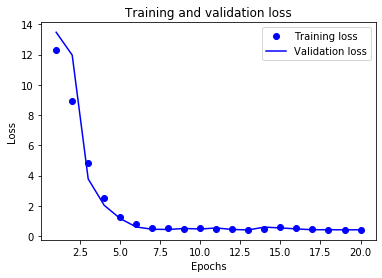

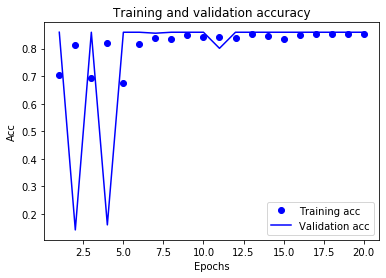

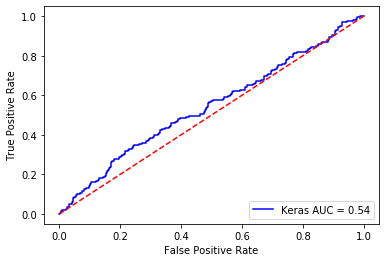

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x19c563650> does not.

In [ ]:
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential
from keras import optimizers
from sklearn import metrics

model = Sequential()
model.add(Dense(15, input_dim = 15, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.adam(lr = 0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data = (x_test, y_test))

y_pred = model.predict_classes(x_test, batch_size = 20, verbose = 1)
target_names = ['1', '0']
print(metrics.classification_report(y_test, y_pred,
    target_names = target_names))

history_dict = history.history
loss, accuracy = model.evaluate(x_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()#
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

from sklearn.metrics import roc_curve, auc

y_pred_keras = model.predict(x_test).ravel()
fpr, tpr, threshold = roc_curve(y_test, y_pred_keras)
roc_auc = auc(fpr,tpr)
plt.plot(fpr, tpr, 'b', label='Keras AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()